In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np

In [3]:
results = pd.read_csv("../dataset/results.csv")
qualifying = pd.read_csv("../dataset/qualifying.csv")
qualifying_merged = pd.merge(results, qualifying, on=['raceId', 'driverId', 'constructorId'], how='inner')

In [4]:
sim_results = pd.read_csv("../dataset/sim_results.csv")
sim_qualifying = pd.read_csv("../dataset/sim_qualifying.csv")
sim_qualifying_merged = pd.merge(sim_results, sim_qualifying, on=['raceId', 'driverId', 'constructorId'], how='inner')
sim_qualifying_merged

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,status,qualifyId,number_y,position_y,q1,q2,q3
0,23782,1010,1,131,44,1,2.0,2,2,18,1,7540,44,1,1:22.043,1:21.014,1:20.486
1,23783,1010,822,131,77,2,1.0,1,1,26,1,7541,77,2,1:22.367,1:21.193,1:20.598
2,23784,1010,20,6,5,3,4.0,4,4,12,1,7542,5,3,1:22.885,1:21.912,1:21.190
3,23785,1010,830,9,33,4,3.0,3,3,15,1,7543,33,4,1:22.876,1:21.678,1:21.320
4,23786,1010,844,6,16,5,5.0,5,5,10,1,7544,16,5,1:22.017,1:21.739,1:21.442
5,23787,1010,154,210,8,6,NaN,R,18,0,27,7545,8,6,1:22.959,1:21.870,1:21.826
6,23788,1010,825,210,20,7,6.0,6,6,8,1,7546,20,7,1:22.519,1:22.221,1:22.099
7,23789,1010,845,1,4,8,12.0,12,12,0,1,7547,4,8,1:22.702,1:22.423,1:22.304
8,23790,1010,8,51,7,9,8.0,8,8,4,1,7548,7,9,1:22.966,1:22.349,1:22.314
9,23791,1010,815,211,11,10,13.0,13,13,0,1,7549,11,10,1:22.908,1:22.532,1:22.781


In [5]:
def setStrip(n):
    if pd.isnull(n):
        return 0
    elif n < 3:
        return 1
    elif n < 6:
        return 2
    elif n < 9:
        return 3
    elif n < 12:
        return 4
    elif n < 15:
        return 5
    else: return 5

In [6]:
sim_qualifying_merged['position_x'] = sim_qualifying_merged['position_x'].map(setStrip)
sim_qualifying_merged

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,status,qualifyId,number_y,position_y,q1,q2,q3
0,23782,1010,1,131,44,1,1,2,2,18,1,7540,44,1,1:22.043,1:21.014,1:20.486
1,23783,1010,822,131,77,2,1,1,1,26,1,7541,77,2,1:22.367,1:21.193,1:20.598
2,23784,1010,20,6,5,3,2,4,4,12,1,7542,5,3,1:22.885,1:21.912,1:21.190
3,23785,1010,830,9,33,4,2,3,3,15,1,7543,33,4,1:22.876,1:21.678,1:21.320
4,23786,1010,844,6,16,5,2,5,5,10,1,7544,16,5,1:22.017,1:21.739,1:21.442
5,23787,1010,154,210,8,6,0,R,18,0,27,7545,8,6,1:22.959,1:21.870,1:21.826
6,23788,1010,825,210,20,7,3,6,6,8,1,7546,20,7,1:22.519,1:22.221,1:22.099
7,23789,1010,845,1,4,8,5,12,12,0,1,7547,4,8,1:22.702,1:22.423,1:22.304
8,23790,1010,8,51,7,9,3,8,8,4,1,7548,7,9,1:22.966,1:22.349,1:22.314
9,23791,1010,815,211,11,10,5,13,13,0,1,7549,11,10,1:22.908,1:22.532,1:22.781


In [7]:
qualifying_merged['position_x'] = qualifying_merged['position_x'].map(setStrip)
qualifying_merged

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,qualifyId,number_y,position_y,q1,q2,q3
0,1,18,1,1,22.0,1,1,1,1,10.0,...,2.0,01:27.5,218.3,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,2,2,3.0,5,1,2,2,8.0,...,3.0,01:27.7,217.586,1,5,3,5,1:25.960,1:25.518,1:27.236
2,3,18,3,3,7.0,7,2,3,3,6.0,...,5.0,01:28.1,216.719,1,7,7,7,1:26.295,1:26.059,1:28.687
3,4,18,4,4,5.0,11,2,4,4,5.0,...,7.0,01:28.6,215.464,1,12,5,12,1:26.907,1:26.188,NaN
4,5,18,5,1,23.0,3,2,5,5,4.0,...,1.0,01:27.4,218.385,1,3,23,3,1:25.664,1:25.452,1:27.079
5,6,18,6,3,8.0,13,3,6,6,3.0,...,14.0,01:29.6,212.974,11,14,8,14,1:26.891,1:26.413,NaN
6,7,18,7,5,14.0,17,3,7,7,2.0,...,12.0,01:29.5,213.224,5,18,14,18,1:27.446,NaN,NaN
7,8,18,8,6,1.0,15,3,8,8,1.0,...,4.0,01:27.9,217.18,5,16,1,16,1:26.140,NaN,NaN
8,9,18,9,2,4.0,2,0,R,9,0.0,...,9.0,01:28.8,215.1,4,2,4,2,1:26.103,1:25.315,1:26.869
9,10,18,10,7,12.0,18,0,R,10,0.0,...,13.0,01:29.6,213.166,3,9,12,9,1:26.919,1:26.164,1:29.593


In [8]:
XTabl = qualifying_merged

XTabl = XTabl.drop('positionText', axis=1)
XTabl = XTabl.drop('resultId', axis=1)
XTabl = XTabl.drop('positionOrder', axis=1)
XTabl = XTabl.drop('time', axis=1)
XTabl = XTabl.drop('fastestLapTime', axis=1)
XTabl = XTabl.drop('q1', axis=1)
XTabl = XTabl.drop('q2', axis=1)
XTabl = XTabl.drop('q3', axis=1)
XTabl = XTabl.drop('milliseconds', axis=1)
XTabl = XTabl.drop('grid', axis=1)
XTabl = XTabl.drop('rank', axis=1)
XTabl = XTabl.drop('qualifyId', axis=1)
XTabl = XTabl.drop('points', axis=1)
XTabl = XTabl.drop('laps', axis=1)
XTabl = XTabl.drop('fastestLapSpeed', axis=1)
XTabl = XTabl.drop('fastestLap', axis=1)
XTabl = XTabl.drop('number_x', axis=1)

XTabl = XTabl.dropna()
YTabl = XTabl['position_x']
XTabl = XTabl.drop('position_x', axis=1)
XTabl

,raceId,driverId,constructorId,statusId,number_y,position_y
0,18,1,1,1,22,1
1,18,2,2,1,3,5
2,18,3,3,1,7,7
3,18,4,4,1,5,12
4,18,5,1,1,23,3
5,18,6,3,11,8,14
6,18,7,5,5,14,18
7,18,8,6,5,1,16
8,18,9,2,4,4,2
9,18,10,7,3,12,9


In [44]:
sim_XTabl = sim_qualifying_merged

sim_XTabl = sim_XTabl.drop('positionText', axis=1)
sim_XTabl = sim_XTabl.drop('resultId', axis=1)
sim_XTabl = sim_XTabl.drop('positionOrder', axis=1)
#XTabl = XTabl.drop('time', axis=1)
#XTabl = XTabl.drop('fastestLapTime', axis=1)
sim_XTabl = sim_XTabl.drop('q1', axis=1)
sim_XTabl = sim_XTabl.drop('q2', axis=1)
sim_XTabl = sim_XTabl.drop('q3', axis=1)
#XTabl = XTabl.drop('milliseconds', axis=1)
sim_XTabl = sim_XTabl.drop('grid', axis=1)
#XTabl = XTabl.drop('rank', axis=1)
sim_XTabl = sim_XTabl.drop('qualifyId', axis=1)
sim_XTabl = sim_XTabl.drop('points', axis=1)
#XTabl = XTabl.drop('laps', axis=1)
#XTabl = XTabl.drop('fastestLapSpeed', axis=1)
#XTabl = XTabl.drop('fastestLap', axis=1)
sim_XTabl = sim_XTabl.drop('number_x', axis=1)

sim_XTabl = sim_XTabl.dropna()
sim_YTabl = sim_XTabl['position_x']
sim_XTabl = sim_XTabl.drop('position_x', axis=1)
sim_XTabl

,raceId,driverId,constructorId,status,number_y,position_y
0,1010,1,131,1,44,1
1,1010,822,131,1,77,2
2,1010,20,6,1,5,3
3,1010,830,9,1,33,4
4,1010,844,6,1,16,5
5,1010,154,210,27,8,6
6,1010,825,210,1,20,7
7,1010,845,1,1,4,8
8,1010,8,51,1,7,9
9,1010,815,211,1,11,10


In [56]:
sim_XTabl['position_y'] = 2
sim_XTabl

,raceId,driverId,constructorId,status,number_y,position_y
0,1010,1,131,1,44,2
1,1010,822,131,1,77,2
2,1010,20,6,1,5,2
3,1010,830,9,1,33,2
4,1010,844,6,1,16,2
5,1010,154,210,27,8,2
6,1010,825,210,1,20,2
7,1010,845,1,1,4,2
8,1010,8,51,1,7,2
9,1010,815,211,1,11,2


In [36]:
x_raw_, y_raw = XTabl.values, YTabl.values

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x_raw_, y_raw, test_size=0.15, random_state=40)

In [38]:
clf = RandomForestClassifier(100, min_samples_split=20)
clf.fit(X_train, Y_train)
Y_test_hat = clf.predict(X_test)
Y_train_hat = clf.predict(X_train)
Y_test_hat = np.rint(Y_test_hat)
Y_train_hat = np.rint(Y_train_hat)

In [39]:
metrics.accuracy_score(Y_test, Y_test_hat)

0.672291296625222

In [57]:
X_sim_raw_, y_sim_raw = sim_XTabl.values, sim_YTabl.values

In [58]:
Y_sim_test_hat = clf.predict(X_sim_raw_)
Y_sim_test_hat = np.rint(Y_sim_test_hat)

In [59]:
metrics.accuracy_score(y_sim_raw, Y_sim_test_hat)

0.4

In [60]:
import matplotlib.pyplot as plt

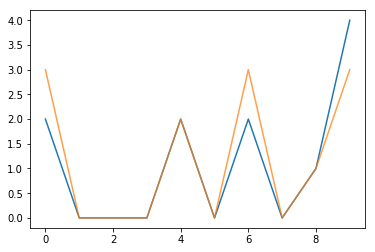

In [55]:
plt.plot(Y_test_hat[:10])
plt.plot(Y_test[:10], alpha=0.75)

In [50]:
metrics.accuracy_score(y_sim_raw, Y_sim_test_hat)

0.3

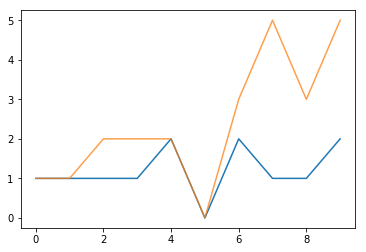

In [61]:
plt.plot(Y_sim_test_hat)
plt.plot(y_sim_raw, alpha=0.75)

In [39]:
metrics.accuracy_score(Y_train, Y_train_hat)

0.7836990595611285

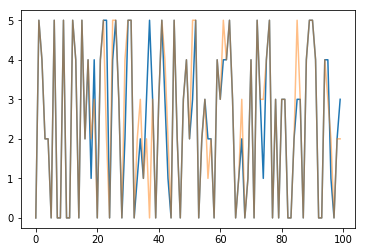

In [40]:
plt.plot(Y_train[:100])
plt.plot(Y_train_hat[:100], alpha=0.5)